# MACD, RIS, ボイリンジャーバンド
## MACD(Moving Average Convergence Divergence)
トレンドを見る指標。マックディーと読む人が多い。 
2つの異なる期間の移動平均線を比較することで市場のトレンドを見る。
- 0以上なら上昇トレンド  
- 0以下なら下降トレンド  

MACDは以下の3つから構成されている
1. 短期移動平均線（EMA12）：過去12日間の価格を平均化したライン。
2. 長期移動平均線（EMA26）：過去26日間の価格を平均化したライン。
3. MACDライン（EMA12-EMA26）：**短期移動平均線から長期移動平均線を引いた値**を表したライン。

※ 利用されている移動平均は指数平滑移動平均(Exponential Moving Average)であり、SMAでないので注意。  EMAは最近の価格変動に対して指数関数的に重み付けする。

## RSI(Relative Strength Index)
売られすぎや買われすぎを判断する指標。過去一定期間の上昇幅と下落幅の比率を計算することによって、市場の過熱感や過剰売買状況を示す。　　
- 20%~30%を下回ると売られすぎ(過売り（Oversold）) => **逆張りの買いと判断**
- 70%~80%を上回ると買われすぎ(過買い（Overbought）) => **逆張りの売りと判断**

RSIは以下の2つの要素から構成されている。
1. 相対力指数（RS）：過去一定期間の上昇幅の平均値を過去一定期間の下落幅の平均値で除算した値を表します。
2. RSI値：RSを用いて算出された値をもとに、0から100の範囲で表した値です。

## ボリンジャーバンド(Bollinger Bands)
移動平均線を中心に、一定期間の標準偏差(ボラティリティ)を差分として上下にバンドを引いたもの。  
一般的に、プラスマイナス標準偏差の2倍を使う。  
正規分布に従っていることを仮定すると、終値はこの$\pm 2\sigma$のボリンジャーバンドに収まる確率が約95％ということ。  
=> **収まらなかった場合は売られすぎ or 買われすぎ と判断できる**  

ボリンジャーバンドは、上部バンドと下部バンドの間の幅が狭くなると、市場が静かであることを示し、幅が広がると、市場が活発化していることを示す。  

アメリカの作家、財務アナリストである「ジョン・ボリンジャー」氏が考案したことが名前の由来。

In [50]:
import pandas as pd
import numpy as np
import talib as ta
from pandas_datareader import data
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
# matplotlibのwarningを無視する
warnings.simplefilter("ignore")

# talibがうまくimportできない場合はnumpyのバージョンに問題がるので以下のコマンドを実行する必要がある
# !pip install --upgrade numpy

ModuleNotFoundError: No module named 'mplfinance'

In [3]:
start = "2019-07-01"
end = "2020-07-01"
df = yf.download('^N225', start, end)

[*********************100%***********************]  1 of 1 completed


## MACDヒストグラムの描画
厳密には、ヒストグラムではなく、塗りつぶしの折れ線グラフ(`fill_between`)で描く(ヒストグラムよりわかりやすい)
`ta.MACD(終値, fastperiod=短期移動平均の期間, slowperiod=長期移動平均の期間, signalperiod=MACDシグナル)`  
一般的には`fastperiod=12, slowperiod=26, signalperiod=9`と引数を指定する場合が多い

In [8]:
df["macd"], df["macdsignal"], df["macdhist"] = ta.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
df.tail(5)

,Open,High,Low,Close,Adj Close,Volume,sma01,sma02,sma03,macd,macdsignal,macdhist
Date,,,,,,,,,,,,
2020-06-24,22541.009766,22663.289062,22479.859375,22534.320312,22534.320312,67000000,22470.978125,22152.969297,20977.637188,419.265675,518.700425,-99.434750
2020-06-25,22287.869141,22423.410156,22165.140625,22259.789062,22259.789062,80800000,22451.843750,22221.268437,21032.862969,375.920739,490.144488,-114.223749
2020-06-26,22424.369141,22589.140625,22408.269531,22512.080078,22512.080078,66600000,22458.501953,22306.225234,21102.236562,357.802813,463.676153,-105.873340
2020-06-29,22255.050781,22281.380859,21969.589844,21995.039062,21995.039062,73700000,22370.055859,22356.360781,21149.361133,298.284895,430.597901,-132.313007
2020-06-30,22335.099609,22448.300781,22273.380859,22288.140625,22288.140625,74200000,22317.873828,22397.039609,21204.122148,271.636110,398.805543,-127.169433


Text(0.5, 0.98, 'N225')

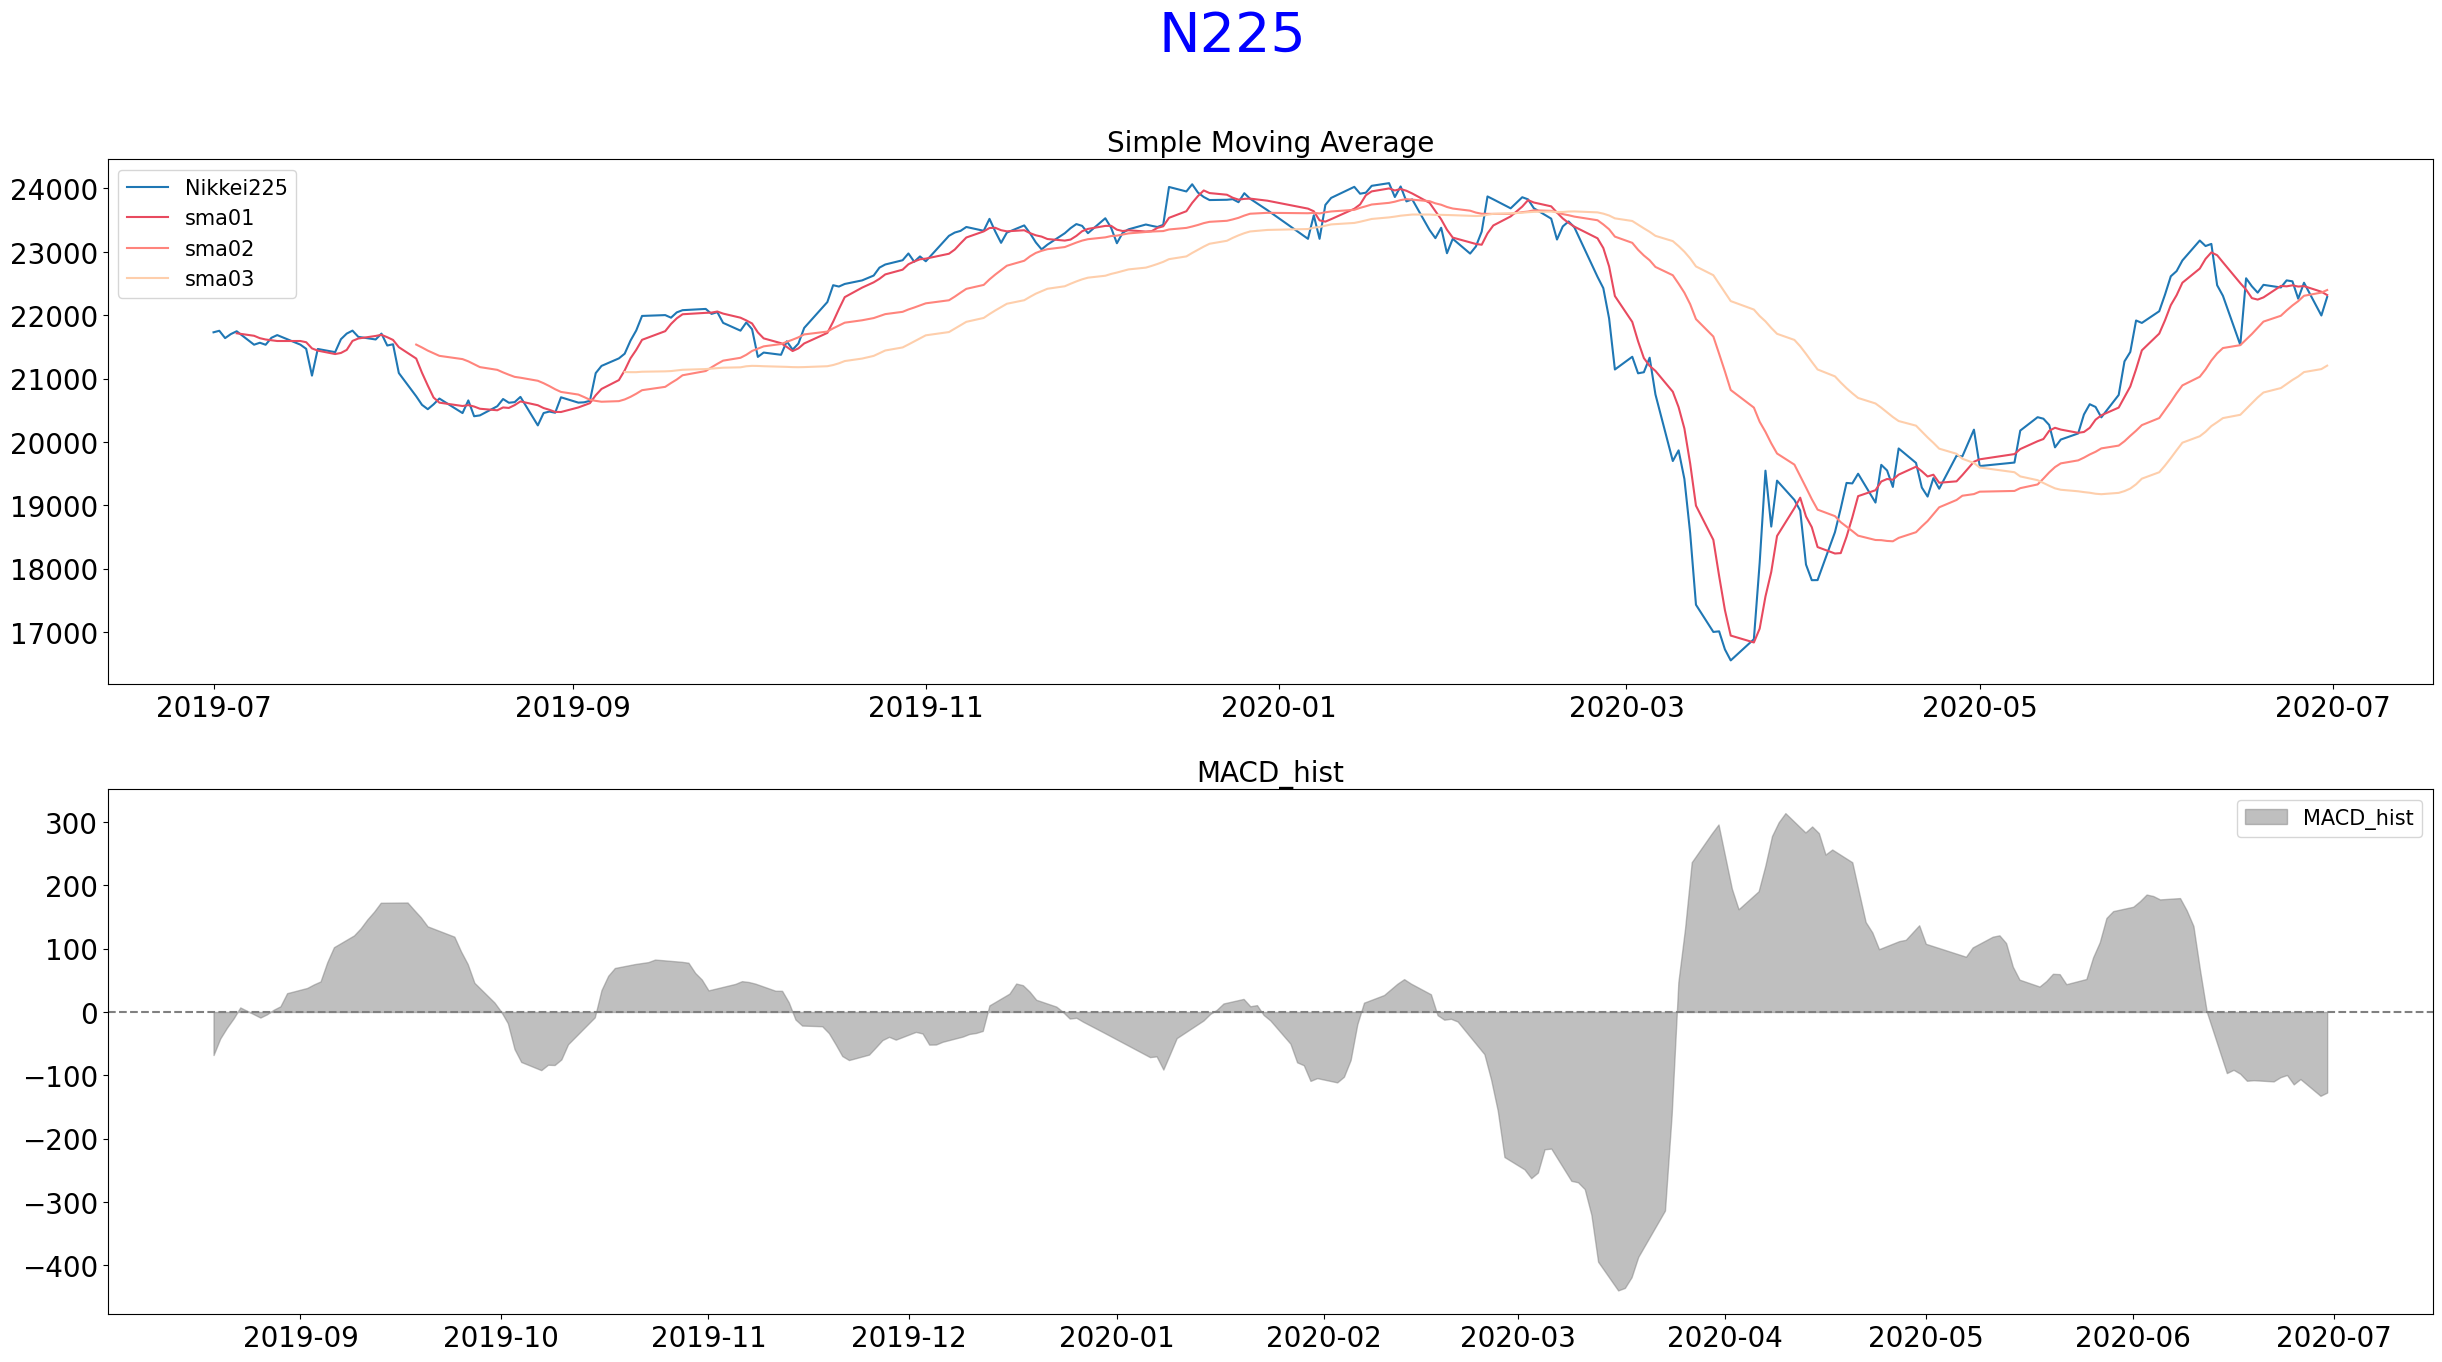

In [22]:
date = df.index
close = df["Adj Close"]

span01=5
span02=25
span03=50

df["sma01"] = close.rolling(window=span01).mean()
df["sma02"] = close.rolling(window=span02).mean()
df["sma03"] = close.rolling(window=span03).mean()

fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(30, 15))
ax1.plot(date, close, label="Nikkei225")
# それぞれのSMAの描画
ax1.plot(date, df["sma01"], label="sma01", color="#e84a5f")
ax1.plot(date, df["sma02"], label="sma02", color="#ff847c")
ax1.plot(date, df["sma03"], label="sma03", color="#feceab")
ax1.set_title("Simple Moving Average", fontsize=20)
ax1.tick_params(axis="both", which="major", labelsize=20)
ax1.legend(fontsize=15)

ax2.fill_between(date, df["macdhist"], alpha=0.5, label="MACD_hist", color="gray")
# y=0 に水平線を引く
# ax2.hlines(0, start, end, colors="gray", linestyles="dashed")
ax2.axhline(y=0, color="gray", linestyle="dashed")
ax2.set_title("MACD_hist", fontsize=20)
ax2.tick_params(axis="both", which="major", labelsize=20)
ax2.legend(fontsize=15)

# 全体のタイトルの指定
fig.suptitle('N225', fontsize=40, color="blue")

## RSIの描画

In [23]:
df["RSI"] = ta.RSI(close, timeperiod=25)
df.tail(5)

,Open,High,Low,Close,Adj Close,Volume,sma01,sma02,sma03,macd,macdsignal,macdhist,RSI
Date,,,,,,,,,,,,,
2020-06-24,22541.009766,22663.289062,22479.859375,22534.320312,22534.320312,67000000,22470.978125,22152.969297,20977.637188,419.265675,518.700425,-99.434750,58.274488
2020-06-25,22287.869141,22423.410156,22165.140625,22259.789062,22259.789062,80800000,22451.843750,22221.268437,21032.862969,375.920739,490.144488,-114.223749,55.916455
2020-06-26,22424.369141,22589.140625,22408.269531,22512.080078,22512.080078,66600000,22458.501953,22306.225234,21102.236562,357.802813,463.676153,-105.873340,57.560379
2020-06-29,22255.050781,22281.380859,21969.589844,21995.039062,21995.039062,73700000,22370.055859,22356.360781,21149.361133,298.284895,430.597901,-132.313007,53.315995
2020-06-30,22335.099609,22448.300781,22273.380859,22288.140625,22288.140625,74200000,22317.873828,22397.039609,21204.122148,271.636110,398.805543,-127.169433,55.263914


Text(0.5, 0.98, 'N225')

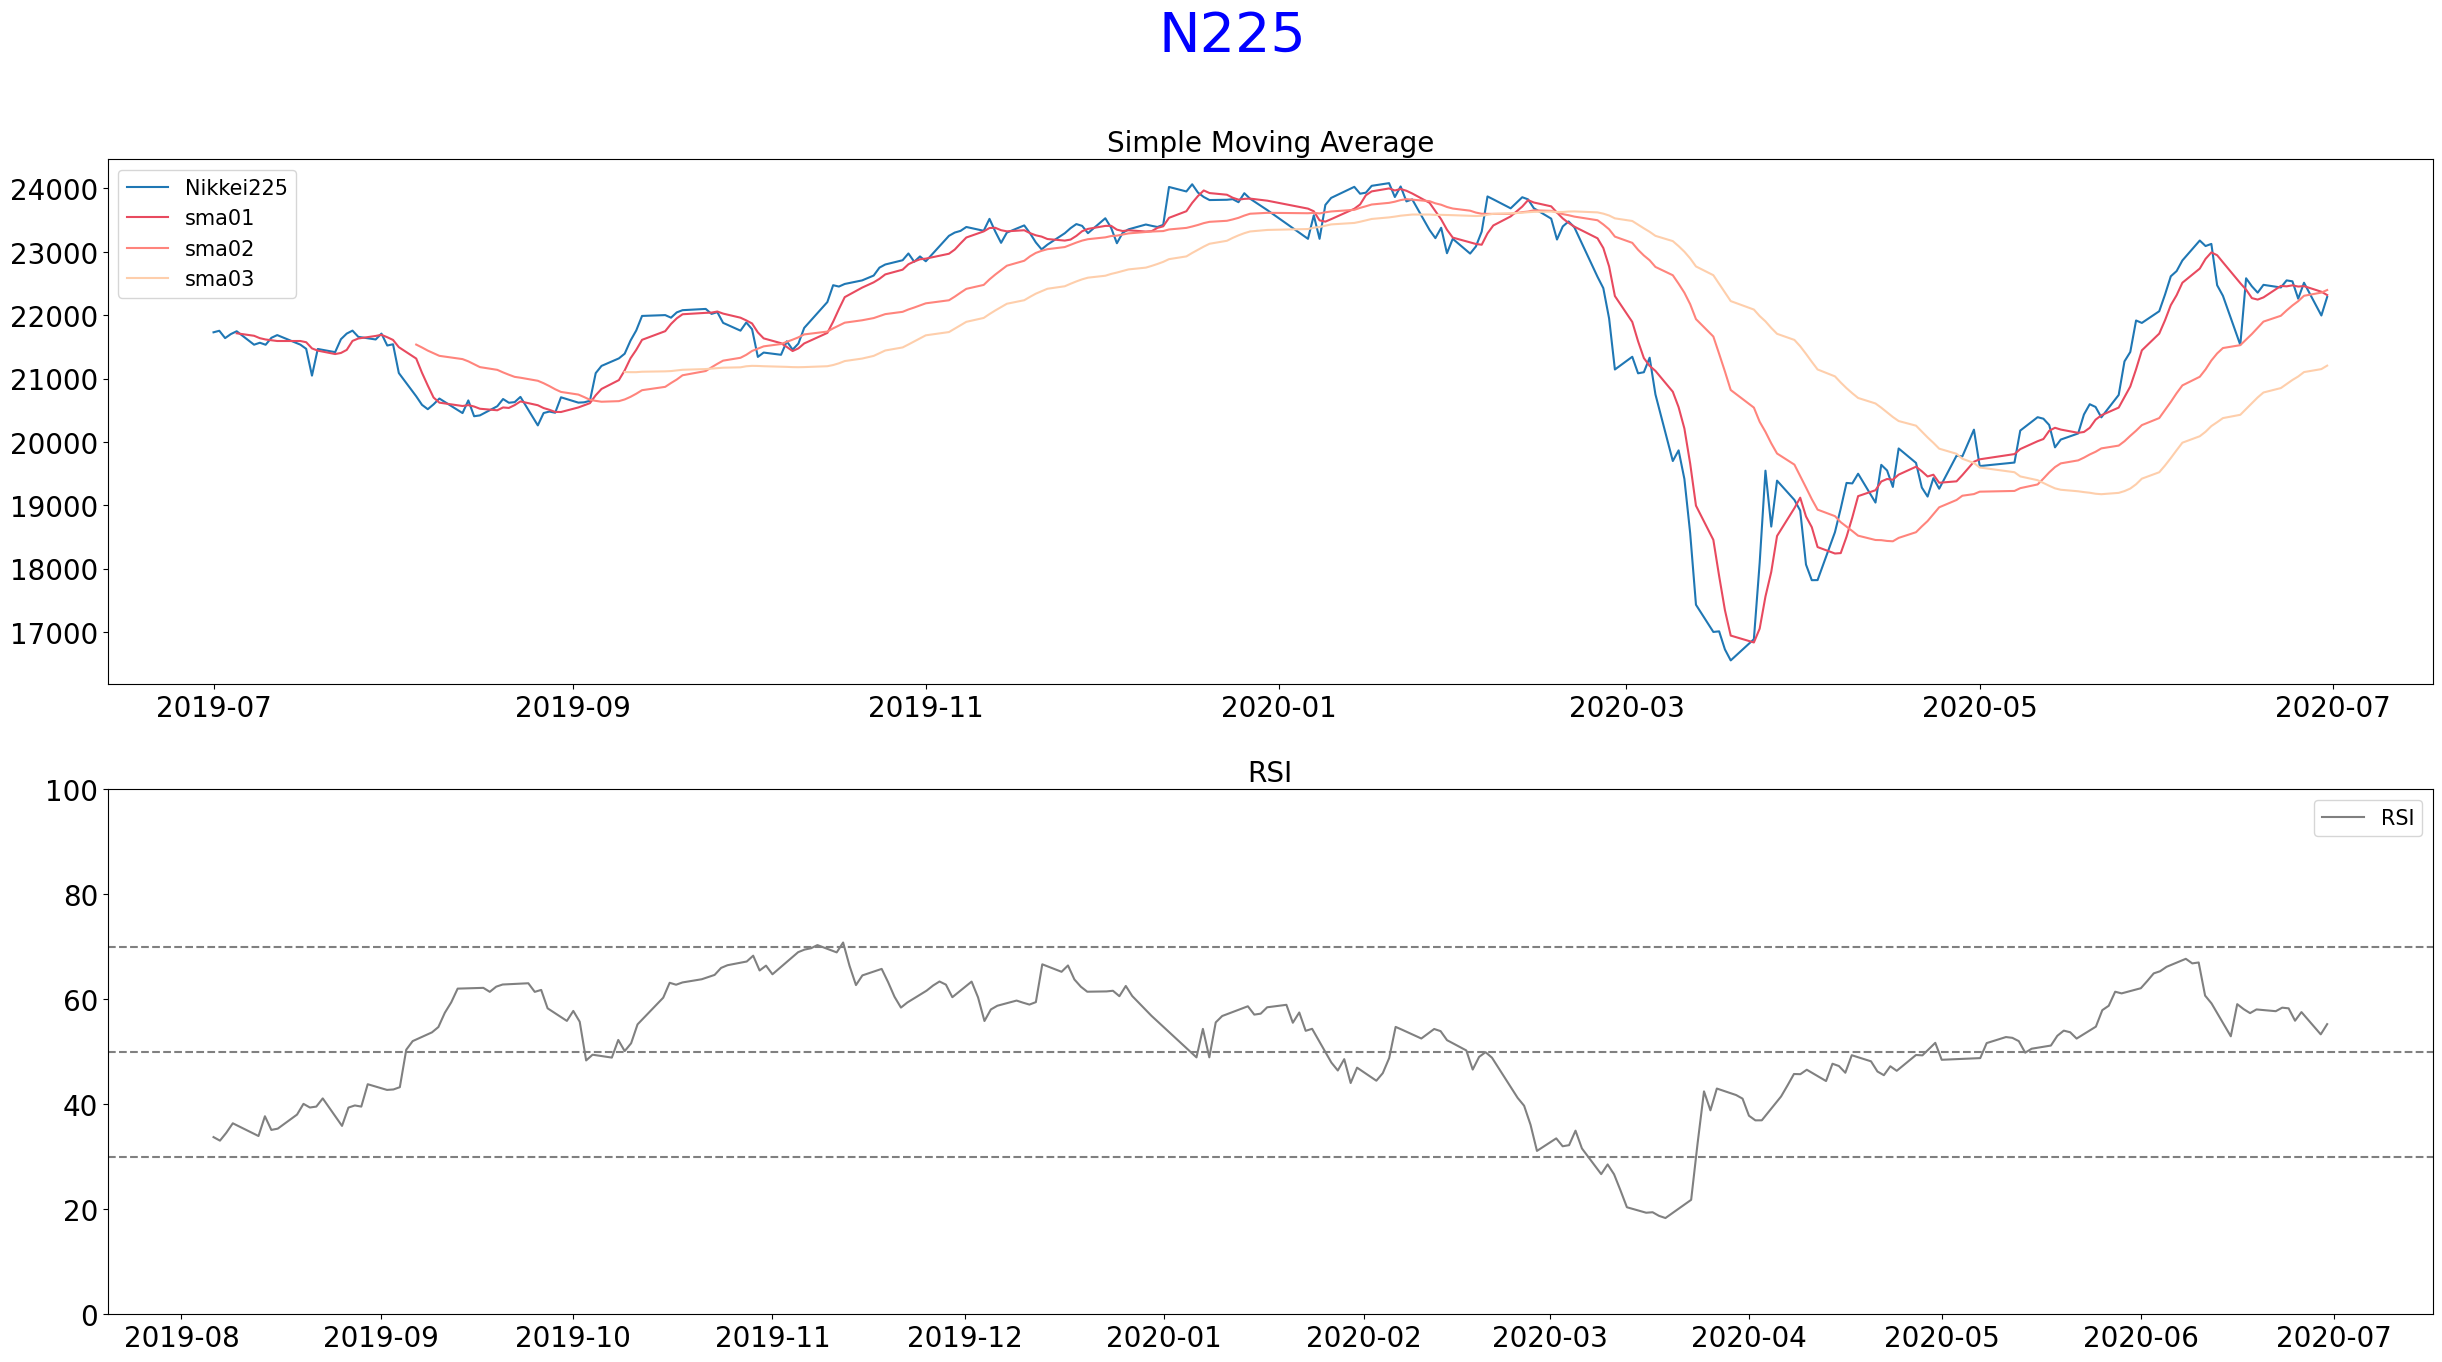

In [31]:
fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(30, 15))
ax1.plot(date, close, label="Nikkei225")
# それぞれのSMAの描画
ax1.plot(date, df["sma01"], label="sma01", color="#e84a5f")
ax1.plot(date, df["sma02"], label="sma02", color="#ff847c")
ax1.plot(date, df["sma03"], label="sma03", color="#feceab")
ax1.set_title("Simple Moving Average", fontsize=20)
ax1.tick_params(axis="both", which="major", labelsize=20)
ax1.legend(fontsize=15)

ax2.plot(date, df["RSI"], label="RSI", color="gray")
ax2.set_ylim(0, 100)
# Oversoldの指標
ax2.axhline(y=30, color="gray", linestyle="dashed")
# 真ん中の水平線
ax2.axhline(y=50, color="gray", linestyle="dashed")
# Overboughtの指標
ax2.axhline(y=70, color="gray", linestyle="dashed")

ax2.set_title("RSI", fontsize=20)
ax2.tick_params(axis="both", which="major", labelsize=20)
ax2.legend(fontsize=15)

# 全体のタイトルの指定
fig.suptitle('N225', fontsize=40, color="blue")

## ボリンジャーバンドの描画
`ta.BBANDS(close, timeperiod=標準偏差を計算する期間の指定, nbdevup=上の線を標準偏差の何倍にするか, nbdevdn=下の線を標準偏差の何倍にするか, matype=移動平均線のタイプ)`  

移動平均のタイプ(matype)の指定方法
- 0 => 単純移動平均
- 1 => 指数移動平均
- 2 => 過重移動平均

In [32]:
df["upper"], df["middle"], df["lower"] = ta.BBANDS(close, timeperiod=25, nbdevup=2, nbdevdn=2, matype=0)
df.tail(5)

,Open,High,Low,Close,Adj Close,Volume,sma01,sma02,sma03,macd,macdsignal,macdhist,RSI,upper,middle,lower
Date,,,,,,,,,,,,,,,,
2020-06-24,22541.009766,22663.289062,22479.859375,22534.320312,22534.320312,67000000,22470.978125,22152.969297,20977.637188,419.265675,518.700425,-99.434750,58.274488,23668.783006,22152.969297,20637.155588
2020-06-25,22287.869141,22423.410156,22165.140625,22259.789062,22259.789062,80800000,22451.843750,22221.268437,21032.862969,375.920739,490.144488,-114.223749,55.916455,23589.084373,22221.268437,20853.452502
2020-06-26,22424.369141,22589.140625,22408.269531,22512.080078,22512.080078,66600000,22458.501953,22306.225234,21102.236562,357.802813,463.676153,-105.873340,57.560379,23454.238943,22306.225234,21158.211526
2020-06-29,22255.050781,22281.380859,21969.589844,21995.039062,21995.039062,73700000,22370.055859,22356.360781,21149.361133,298.284895,430.597901,-132.313007,53.315995,23321.613062,22356.360781,21391.108501
2020-06-30,22335.099609,22448.300781,22273.380859,22288.140625,22288.140625,74200000,22317.873828,22397.039609,21204.122148,271.636110,398.805543,-127.169433,55.263914,23255.768474,22397.039609,21538.310745


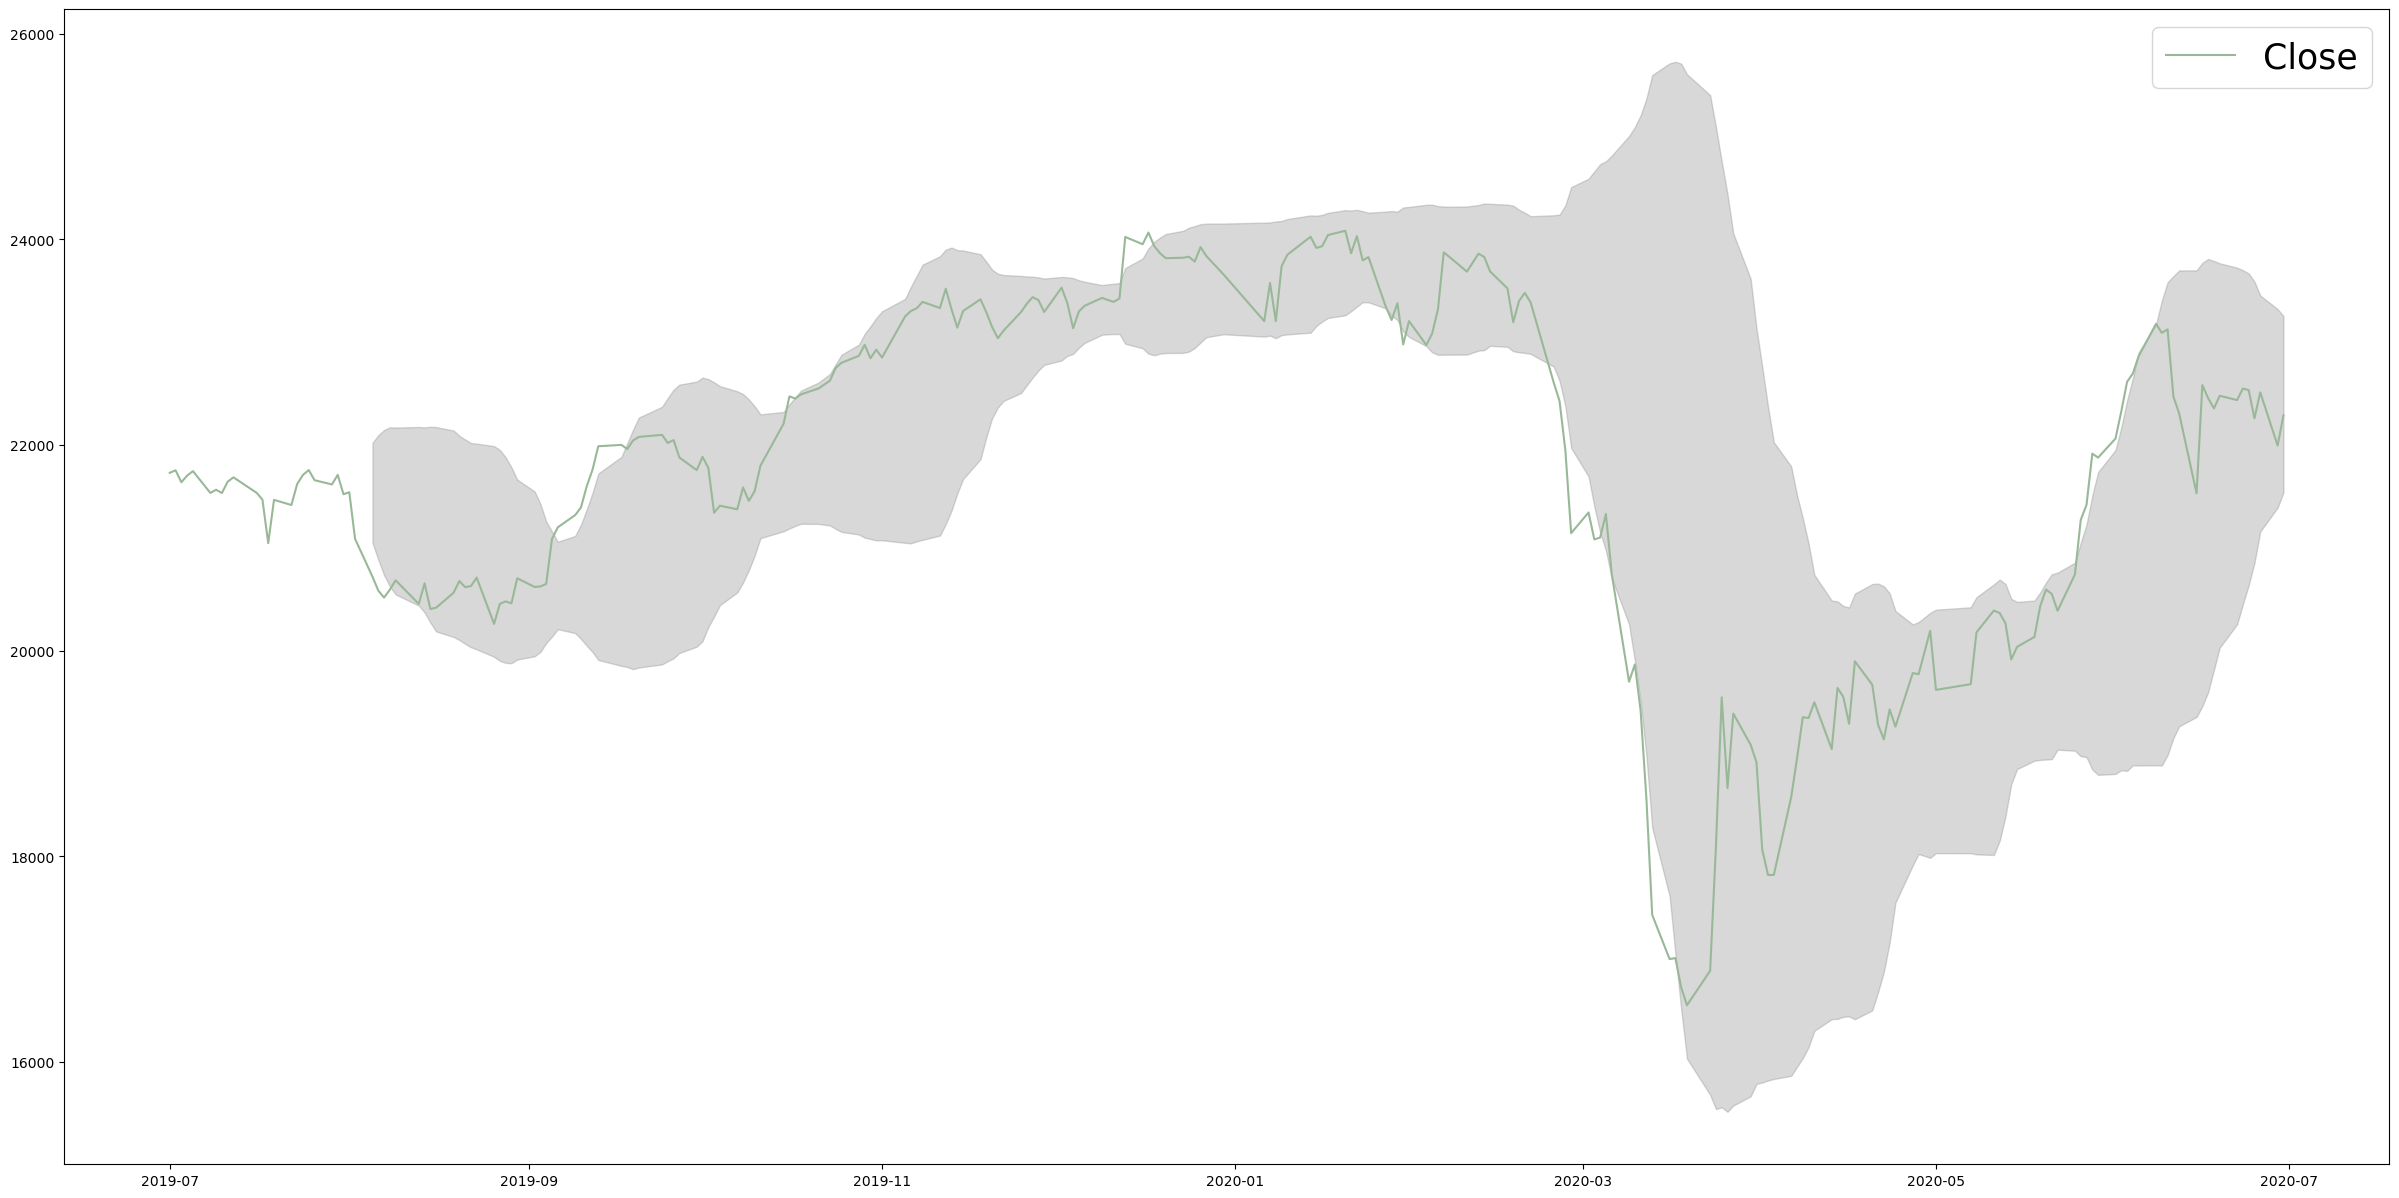

In [35]:
plt.figure(figsize=(30, 15))
plt.plot(date, close, label="Close", color="#99b898")
plt.fill_between(date, df["upper"], df["lower"], color="gray", alpha=0.3)
plt.legend(fontsize=25)

## 全ての指標(移動平均、出来高、MACD, RSI, ボリンジャーバンド)を同時に描画する

Text(0.5, 0.98, 'N225')

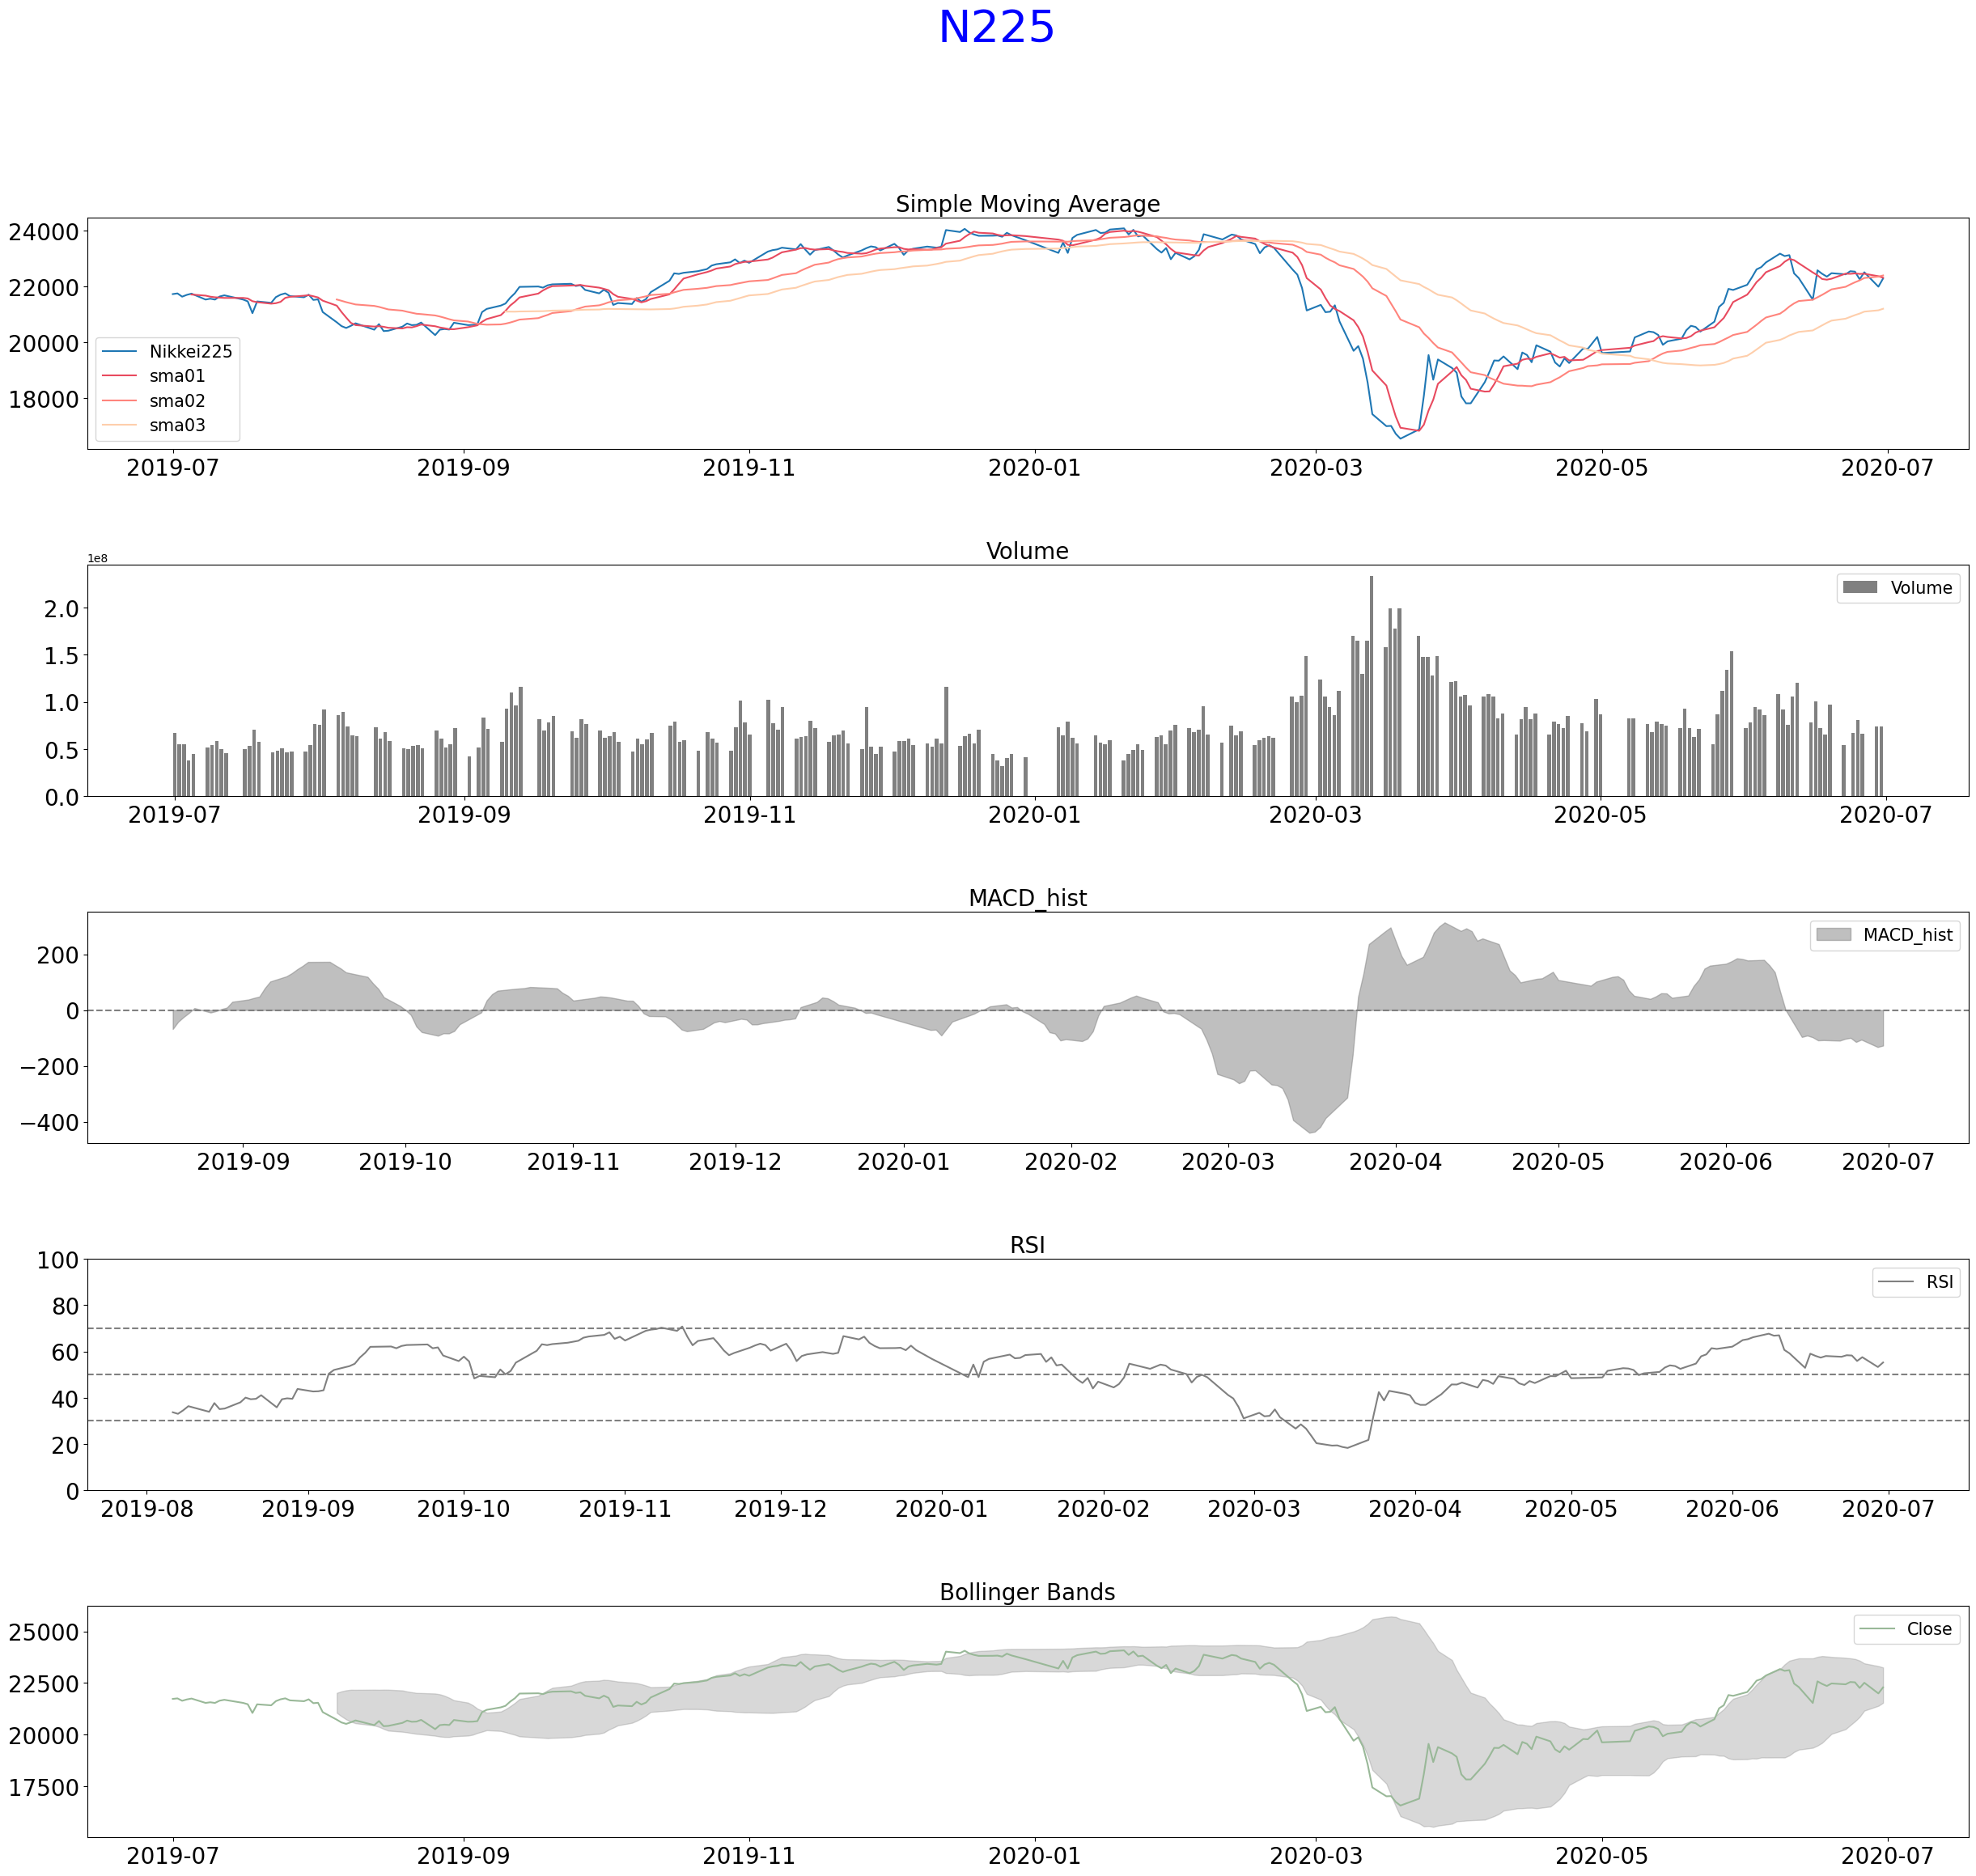

In [49]:
fig, [ax1, ax2, ax3, ax4, ax5] = plt.subplots(5, 1, figsize=(30, 26))
fig.subplots_adjust(hspace=0.5) # 垂直方向のスペースを 0.5 に指定

# 移動平均-----------------------------------------------------------
ax1.plot(date, close, label="Nikkei225")
# それぞれのSMAの描画
ax1.plot(date, df["sma01"], label="sma01", color="#e84a5f")
ax1.plot(date, df["sma02"], label="sma02", color="#ff847c")
ax1.plot(date, df["sma03"], label="sma03", color="#feceab")
ax1.set_title("Simple Moving Average", fontsize=20)
ax1.tick_params(axis="both", which="major", labelsize=20)
ax1.legend(fontsize=15)

# 出来高-----------------------------------------------------------
ax2.bar(date, df["Volume"], label="Volume", color="gray")
# tickのサイズを変更する
ax2.set_title("Volume", fontsize=20)
ax2.tick_params(axis="both", which="major", labelsize=20)
ax2.legend(fontsize=15)


# MACD-----------------------------------------------------------
ax3.fill_between(date, df["macdhist"], alpha=0.5, label="MACD_hist", color="gray")
# y=0 に水平線を引く
# ax2.hlines(0, start, end, colors="gray", linestyles="dashed")
ax3.axhline(y=0, color="gray", linestyle="dashed")
ax3.set_title("MACD_hist", fontsize=20)
ax3.tick_params(axis="both", which="major", labelsize=20)
ax3.legend(fontsize=15)


# RSI-----------------------------------------------------------
ax4.plot(date, df["RSI"], label="RSI", color="gray")
ax4.set_ylim(0, 100)
# Oversoldの指標
ax4.axhline(y=30, color="gray", linestyle="dashed")
# 真ん中の水平線
ax4.axhline(y=50, color="gray", linestyle="dashed")
# Overboughtの指標
ax4.axhline(y=70, color="gray", linestyle="dashed")

ax4.set_title("RSI", fontsize=20)
ax4.tick_params(axis="both", which="major", labelsize=20)
ax4.legend(fontsize=15)


# ボリンジャーバンド-----------------------------------------------------------
ax5.plot(date, close, label="Close", color="#99b898")
ax5.fill_between(date, df["upper"], df["lower"], color="gray", alpha=0.3)
ax5.set_title("Bollinger Bands", fontsize=20)
ax5.tick_params(axis="both", which="major", labelsize=20)
ax5.legend(fontsize=15)

# 全体のタイトルの指定
fig.suptitle('N225', fontsize=40, color="blue")